## Light Interception HowTo

## Tools

In [3]:
%gui qt4
import light_it as ltfs  # a bit like rtfd

- Some utilities have been gathered in module light_it.py to ease light simulation on virtual scenes produced by lpy.
- Behind the scene it calls the Caribu light model (Chelle et al. 1998), configured to simulate first order interception (no rediffusion)
- Specifying the gui is required, in notebooks, or anaconda prompt (ipython --gui=qt4)

## Run the model and get the scene

In [4]:
lsys, lstring, lscene = ltfs.run_lsystem('leafy.lpy')
lsys.plot(lstring)

- The lpy model has been developped within lpy and saved in a file 'leafy.lpy'.
- lsys in an object containing the lsystem code, that has methods (eg 'plot') to run / siplay lstring and lscene
- lstring is an object that contains the string produced by the lsystem. A bit like a list of module (see bellow cells)
- lscene contains the scene (3D geometrical objects, one per module, identified by the index of the module in the string

In [5]:
lstring

AxialTree(/(90)F(1)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)[^(-45)Leaf(5)]F(1)/(180)A(10))

In [6]:
lstring[0]

/(90)

## Light it !

In [7]:
cscene, raw, agg = ltfs.illuminate(lscene, scene_unit='cm')
_, _ = cscene.plot(raw, maxval=1.01)

- illuminate calls caribu on the given scene. Specifying scene unit is important as light flux radiances are expressed in W.m-2
    - Try to figure out where was the light positioned (and find its intensity- tip : colors goes from blue (zero) to red (maxval))!
- cscene is an object returned by the light model, and contains methods to rerun the simulation differently, add new sources, display...
- raw is a dict(keys = scene primitive ids) containing the irradiances of all triangles of the scene mesh
- agg is a dataframe, indexed by primitive ids, containing the output of the simulation
 

# Explore results

- results for all primitives

In [8]:
agg

,Eabs,Ei,area
1,0.000000,0.000000,0.000061
4,0.000000,0.000000,0.000114
6,0.000000,0.000000,0.000061
10,0.000000,0.000000,0.000114
12,0.000000,0.000000,0.000061
16,0.000000,0.000000,0.000114
18,0.000000,0.000000,0.000061
22,0.000000,0.000000,0.000114
24,0.000000,0.000000,0.000061
28,0.000000,0.000000,0.000114


- results for leaves only (can be found thanks to lstring module names matching leaf_name)

In [11]:
irr = ltfs.leaf_irradiance(agg, lstring, leaf_name='Leaf')
irr

,Eabs,Ei,area,leaf_rank
4,0.000000,0.000000,0.000114,1
10,0.000000,0.000000,0.000114,2
16,0.000000,0.000000,0.000114,3
22,0.000000,0.000000,0.000114,4
28,0.000000,0.000000,0.000114,5
34,0.000000,0.000000,0.000114,6
40,0.000000,0.000000,0.000114,7
46,0.000000,0.000000,0.000114,8
52,0.575724,0.661752,0.000114,9
58,0.576238,0.662343,0.000114,10


<AxesSubplot:xlabel='leaf_rank'>

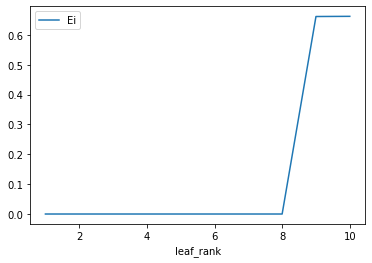

In [12]:
irr.plot('leaf_rank', 'Ei')

- Mean irradiance on leaves (plant level)

In [14]:
mean_irr = ltfs.leaf_irradiance(agg, lstring, leaf_name='Leaf', aggregate=True)
mean_irr

Eabs         0.115196
Ei           0.132409
area         0.000114
leaf_rank    5.500000
dtype: float64

## Explore influence of architecture

- To vary architecture, some parameter of the lsystem have to be changed
- Rather than doing it in the lsystem file, it is more convenient to pass such parameters to run_lsystem function
- to do so, the following lines should be inserted in the lsystem code, just after parameter definitions (see leafy.lpy for an example)

In [4]:
lsys, lstring, lscene = ltfs.run_lsystem('leafy.lpy', {'phi': 20})
lsys.plot(lstring)

In [5]:
lsys, lstring, lscene = ltfs.run_lsystem('leafy.lpy', {'phi': 20})
cscene, raw, agg = ltfs.illuminate(lscene, scene_unit='cm')
_, _ = cscene.plot(raw, maxval=1.01)

- Try to find the best plant (with regards to light interception efficiency)

## Compare with an infinite scene

- setting the toric pattern allows to simulate light interception as if the plant was replicated on a grid (one plant every dx units along x and one plant every dy along y direction)

In [7]:
pattern = ltfs.toric_canopy_pattern(dx=2, dy=2)
cscene, raw, agg = ltfs.illuminate(lscene, scene_unit='cm', pattern = pattern)
_, _ = cscene.plot(raw, maxval=1.01)

## Change light sources

* specify a different light source:

In [14]:
elevation = 70  # source elevation angle (deg): from soil to source
azimuth = 45  #  source azimuth angle (deg, positive clockwise): from North to source
irradiance = 1  # source irradiance (W.m-2)
light = (elevation, azimuth, irradiance)
cscene, raw, agg = ltfs.illuminate(lscene, light=light, scene_unit='cm')
_, _ = cscene.plot(raw, maxval=1.01)

- specify two light sources, and orient the scene with respect to North:

In [15]:
elevations = 70, 45  # source elevation angle (deg): from soil to source
azimuths = 45, 45  #  source azimuth angle (deg, positive clockwise): from North to source
irradiances = 0.5, 0.5  # source irradiance on a horizontal surface(W.m-2)
lights = (elevations, azimuths, irradiances)
north = 120  # the angle (deg, positive clockwise) from X+ to North
cscene, raw, agg = ltfs.illuminate(lscene, light=lights, scene_unit='cm', north=north)
_, _ = cscene.plot(raw, maxval=1.01)

* Note that in this case, we keep the sum of irradiance equal to 1. This normalisation of source irradiances is very often used because:
    - It allows to make explicit the relative contribution of the different sources to horizontal irradiance, which is the most frequent measurement found in meteorological records
    - It is simple to convert back to absolute irradiance values by multipliying normalised irradiance of any object in the scene by the (measured) incoming irradiance
    - It ease the computation of total energy captured by organs, especialy when the number of sources increase and/or vary in intensity with time (see next notebooks). 

## To go further

- setup more complex lights (sun, sky...): see notebook 'sky_models.ipynb'
- compute photosynthesis : see notebook 'photosynthesis.ipynb'
- explore parameter space with method (see TD sensitivity)